In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# 타이타닉 데이터 로딩
titanic_df = pd.read_csv('D:/shinj/Data/[2]titanic-kaggle/Data/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# 데이터 정보(구조, 의미) 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Null 처리 -> DataFrame => fillna()
# Age, Cabin, Embarked 
# Null 수 
np.sum(titanic_df['Age'].isnull()),\
np.sum(titanic_df['Cabin'].isnull()),\
np.sum(titanic_df['Embarked'].isnull())

(177, 687, 2)

In [8]:
titanic_df['Age'].isnull().sum()

177

In [9]:
# 데이터 분석
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic_df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
A10            1
F E69          1
D56            1
A32            1
D49            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# 나이 Null 채우기
titanic_df['Age'].fillna(
      titanic_df['Age'].mean()
    , inplace=True
)
titanic_df['Age'].isnull().sum()

0

In [13]:
# Cabin fillna
titanic_df['Cabin'].fillna(
      'N'
    , inplace=True
)
titanic_df['Cabin'].notnull().sum()

891

In [14]:
titanic_df['Embarked'].fillna(
    'N'
    , inplace=True
)
titanic_df['Embarked'].notnull().sum()

891

In [15]:
titanic_df['Cabin'][:5]

0       N
1     C85
2       N
3    C123
4       N
Name: Cabin, dtype: object

In [16]:
# Cabin 의 구역 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

#### 시각화

In [17]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [18]:
# 성별 생존 여부에 대한 분포(개수)
# groupby -> count 
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

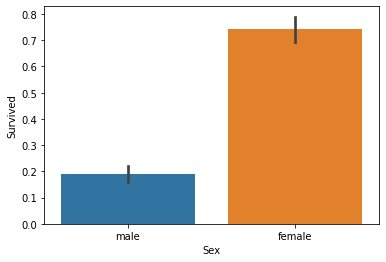

In [19]:
# sns barplot
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

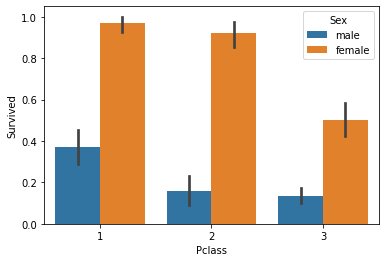

In [20]:
sns.barplot(
      x='Pclass'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
)

In [21]:
# 입력한 나이값을 가지고 구간값을 대입
def get_cate(age):
    cate = ''
    if age <= -1: cate='Unknown'
    elif age <= 5: cate='Baby'
    elif age <= 12: cate='Child'
    elif age <= 18: cate='Teenager'
    elif age <= 25: cate='Student'
    elif age <= 35: cate='Young Adult'
    elif age <= 60: cate='Adult'
    else: cate='Elderly'
    
    return cate

In [22]:
# X축의 값을 순차적으로 표시하기 위한 설정 값 세팅
group_names = ['Unknown','Baby','Child','Teenager'
              ,'Student','Young Adult','Adult','Elderly']

titanic_df['Age_cate']=\
titanic_df['Age'].apply(lambda x : get_cate(x))

In [23]:
titanic_df[['Age','Age_cate']][:5]

,Age,Age_cate
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


<AxesSubplot:xlabel='Age_cate', ylabel='Survived'>

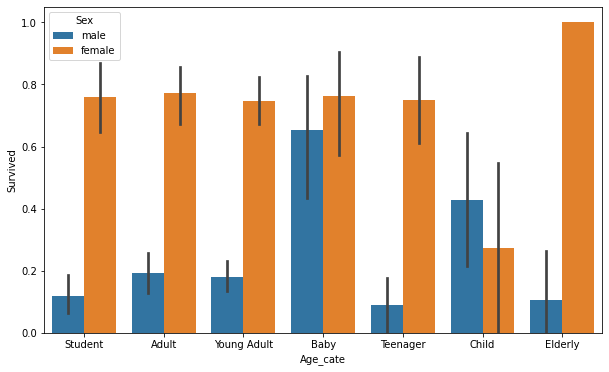

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
      x='Age_cate'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
#     , order=group_names
)

<AxesSubplot:xlabel='Age_cate', ylabel='Survived'>

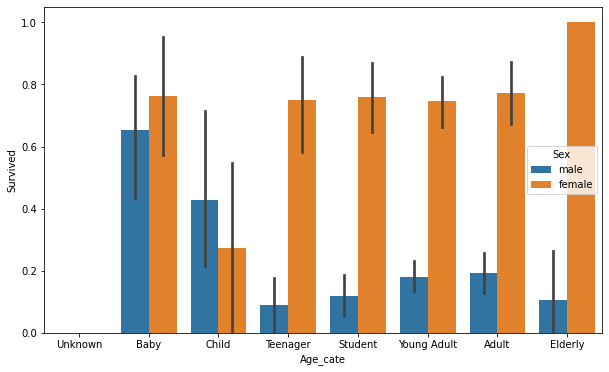

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
      x='Age_cate'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
    , order=group_names
)

### 인코딩 (Cabin, Sex, Embarked)

In [26]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    '''dataDF : 입력 데이터프레임'''
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

In [27]:
titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult


---
## 완성 코드
---

In [28]:
# Age, Cabin, Embarked, Fare => Null 처리 함수 
# DataFrame object => fillna() method
def fillna_df(df):
    '''Age => mean()'''
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [29]:
# 불필요한 컬럼 제거 function
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket']
            , axis=1
            , inplace=True
           )
    return df

In [30]:
# Cabin, Sex, Embarked 레이블 인코딩 함수
# Cabin : C85 => C => 레이블 인코딩 진행 필요
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # Cabin : C85 => C 
    features=['Cabin','Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

In [31]:
# 앞에서 선언한 함수를 다 적용하는 함수
def transform_features(df):
    df = fillna_df(df) # Null 채우기
    df = drop_features(df) # 필요없는 컬럼 삭제
    df = format_features(df) # 인코딩 
    return df

### 머신러닝 알고리즘 실행

In [32]:
# 전처리
# 전체 원본 데이터 : titanic_df
titanic_df = pd.read_csv('D:/shinj/Data/[2]titanic-kaggle/Data/train.csv')

# 답 추출
y_tit_df = titanic_df['Survived']

# 답을 빼고 데이터 추출
X_tit_df = titanic_df.drop('Survived', axis=1)

# 데이터를 정리()
X_tit_df = transform_features(X_tit_df)

In [33]:
# 학습할 데이터 완성
# 1. 학습데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(
      X_tit_df # 분리할 데이터
    , y_tit_df # 분리할 답
    , test_size=0.2 # 테스트 데이터 크기
    , random_state=11
)

In [34]:
# 1. 머신러닝 알고리즘에 기본 적용 
# 답이 존재하니 지도학습이고, 분류(사느냐,죽느냐) 알고리즘
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 분류문제 => 일차적인 평가지표 => 정확도
from sklearn.metrics import accuracy_score

# 위 알고리즘의 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 학습 진행 => 학습한 모델 생성
# 1. dt_clf 정확도 출력
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test) # 테스트데이터 입력 => 예측값
print('dt_clf 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# 2. rf_clf 정확도 출력
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test) # 테스트데이터 입력 => 예측값
print('rf_clf 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# lr_clf 정확도 출력
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test) # 테스트데이터 입력 => 예측값
print('rf_clf 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

dt_clf 정확도 : 0.7877
rf_clf 정확도 : 0.8547
rf_clf 정확도 : 0.8492


In [36]:
# 머신러닝 알고리즘에 적용 = KFold  (page 139)
# 답이 존재하니 지도학습이고, 분류(사느냐,죽느냐) 알고리즘
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression

In [37]:
# 머신러닝 알고리즘에 적용 = cross_val_score 
# 답이 존재하니 지도학습이고, 분류(사느냐,죽느냐) 알고리즘
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression

from sklearn.model_selection import cross_val_score

al_name = [dt_clf, rf_clf, lr_clf]

for al in al_name:
    scores = cross_val_score(
    #       dt_clf # 적용할 알고리즘
    #       rf_clf
          al
        , X_tit_df # 학습할 데이터 
        , y_tit_df # 학습할 답
        , cv=5 # KFold
    )

    for n, accu in enumerate(scores):
        out_str = '교차검증 {0} 정확도 : {1:.4f}'
        print(out_str.format(n, accu))

    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879
교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균 정확도 : 0.8137
교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.7978
평균 정확도 : 0.7845


In [38]:
dt_clf?

In [39]:
# 머신러닝 알고리즘에 적용 = GridSearchCV : 베스트 파라미터 찾기
# 답이 존재하니 지도학습이고, 분류(사느냐,죽느냐) 알고리즘
# DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

grid_param = {
      'max_depth' : [2,3,5,10] # 4개
    , 'min_samples_split' : [2,3,5] # 3개
    , 'min_samples_leaf' : [1,5,8] # 3개
}
# 180번 학습시켜서 베스트 파라미터 찾을수 있는 객체 생성
grid_dclf = GridSearchCV(
    # 적용할 알고리즘 / rf_clf 적용 가능, lr_clf 불가능
      dt_clf 
    , param_grid=grid_param # 적용할 파라미터 딕셔너리
    , scoring='accuracy' # 적용할 평가지표 = 정확도 
    , cv=5 # 적용할 교차검증
)

# 베스트 찾기
grid_dclf.fit(X_train, y_train)

print('베스트 파라미터 : ', grid_dclf.best_params_)
print('베스트 정확도 : ', grid_dclf.best_score_)

# 여기까지 진행된 부분은 베스트를 찾기 위한 것이다.

# 베스트 모델 => 예측 => 평가
best_dclf = grid_dclf.best_estimator_ # 베스트 모델

# 테스트 데이터 입력해서 예측값을 추출
dpred = best_dclf.predict(X_test) # 테스트 데이터

# 예측값(dpred)과 원래답(y_test)을 비교 => 정확도 추출
accu = accuracy_score(y_test, dpred)

print('최종 정확도 : {0:.4f}'.format(accu))

베스트 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
베스트 정확도 :  0.7991825076332119
최종 정확도 : 0.8715
